## Following dataset has target variable as categorical so its is a classification problem

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Exploration of the dataset

#### In this case we are already getting the dataset from the BU or user so there is no need for train or test split

In [5]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

In [7]:
train_df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [8]:
test_df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [9]:
train_df.shape

(31647, 18)

In [10]:
test_df.shape

(13564, 17)

In [13]:
train_df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

### Null Value Interpretation

In [53]:
train_df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

Here there are no missing values but generally we will not be getting this type of clean data in real scenrio where we have to do some data cleaning and EDA

### Univariate Analysis

#### Now we will analyse every column so that we could able to get the relationships between the independent and dependent variables

In [14]:
train_df['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

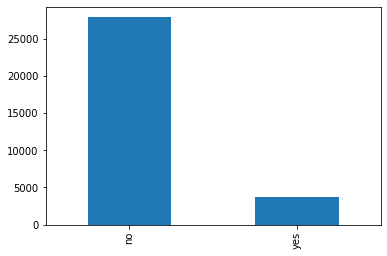

In [16]:
train_df['subscribed'].value_counts().plot.bar()

#### here we have done the normalisaiton or we have made Standard for both the values

In [15]:
train_df['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

So out of 31647 only 3715 have subscribed its about 12%. So to find the details and the reason for it we will do first univariate analysis of the attributes and then we can go for the relationships between the independent and dependent variable

##### age

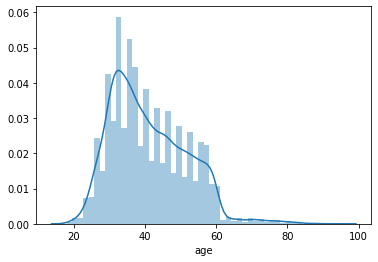

In [18]:
sns.distplot(train_df['age'])

Here we can infer that the most of the users are between 20 to 60 years. Now we will move to next attr Job.

##### Job

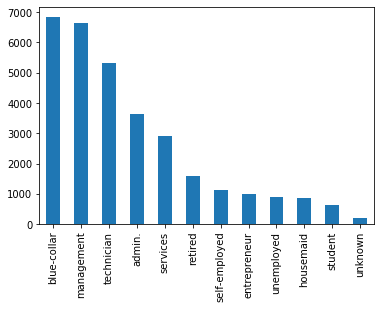

In [20]:
train_df['job'].value_counts().plot.bar()

Here we can infer that the most of the users are blue-collar and students are least as students generally dont buy a term deposit.

Now we will check the default history for the users

##### default

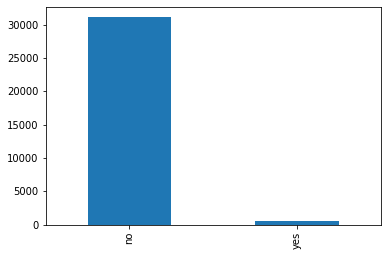

In [24]:
train_df['default'].value_counts().plot.bar()

In [25]:
train_df['default'].value_counts()

no     31062
yes      585
Name: default, dtype: int64

In [26]:
train_df['default'].value_counts(normalize=True)

no     0.981515
yes    0.018485
Name: default, dtype: float64

So more than 98% clients have no default history

Lets move to Bivariate Analysis

### Bivariate Analysis

In [28]:
pd.crosstab(train_df['job'],train_df['subscribed'])

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26

Text(0, 0.5, 'Percentage')

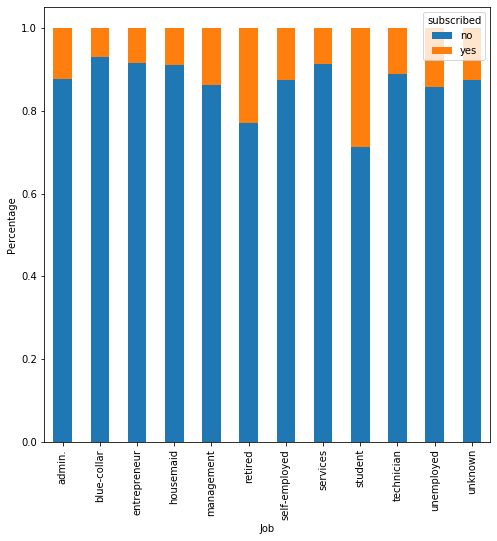

In [30]:
job_sub=pd.crosstab(train_df['job'],train_df['subscribed'])
job_sub.div(job_sub.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

From the above graph we can infer that the students and retired students have higher chances of taking the term deposits but mostly students dont buy term deposits which is surprising

So what could be the reason? may be the students in datasets are less comparative to other jobs as we have already seen earlier.So we can finaaly infer that most students buy term deposits from this dataset

Similarily for deault we will do the same analysis

In [33]:
pd.crosstab(train_df['default'],train_df['subscribed'])

subscribed     no   yes
default                
no          27388  3674
yes           544    41

Text(0, 0.5, 'Percentage')

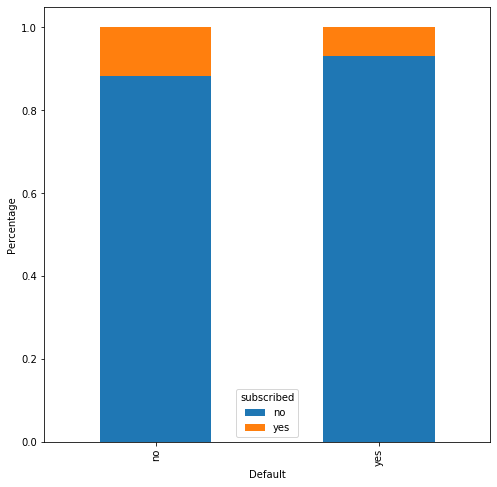

In [32]:
default_sub=pd.crosstab(train_df['default'],train_df['subscribed'])
default_sub.div(default_sub.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(8,8))
plt.xlabel('Default')
plt.ylabel('Percentage')

We can infer that clients having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have previous default history.

Let's now look at how correlated our numerical variables are. We will see the correlation between each of these variables and the variable which have high negative or positive values are correlated. By this we can get an overview of the variables which might affect our target variable. We will convert our target variable into numeric values first.

In [34]:
train_df['subscribed'].replace('no',0,inplace=True)
train_df['subscribed'].replace('yes',1,inplace=True)

In [35]:
corr=train_df.corr()

In [36]:
corr

ID       age   balance       day  duration  campaign  \
ID          1.000000  0.013337  0.067897 -0.063399  0.007183 -0.103508   
age         0.013337  1.000000  0.103245 -0.011056 -0.003870  0.005733   
balance     0.067897  0.103245  1.000000  0.003461  0.024274 -0.012032   
day        -0.063399 -0.011056  0.003461  1.000000 -0.032288  0.159168   
duration    0.007183 -0.003870  0.024274 -0.032288  1.000000 -0.080305   
campaign   -0.103508  0.005733 -0.012032  0.159168 -0.080305  1.000000   
pdays       0.436148 -0.021947  0.001789 -0.087626  0.000529 -0.087570   
previous    0.254476  0.005761  0.013843 -0.048752  0.001783 -0.033151   
subscribed  0.296663  0.024538  0.050807 -0.029600  0.389838 -0.070607   

               pdays  previous  subscribed  
ID          0.436148  0.254476    0.296663  
age        -0.021947  0.005761    0.024538  
balance     0.001789  0.013843    0.050807  
day        -0.087626 -0.048752   -0.029600  
duration    0.000529  0.001783    0.389838  
campaign   -0.087570 -0.033151   -0.070607  
pdays       1.000000  0.428938    0.108290  
previous    0.428938  1.000000    0.088081  
subscribed  0.108290  0.088081    1.000000

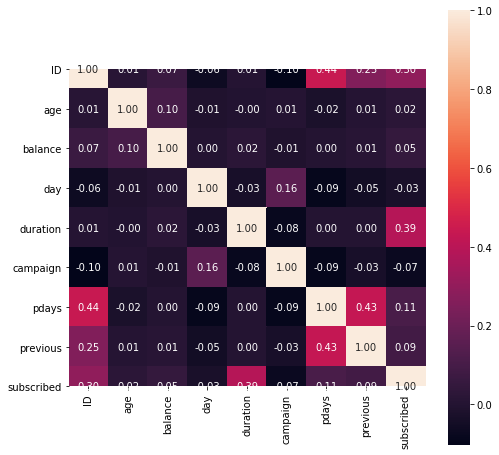

In [52]:
plt.figure(figsize=(8,8))
sns.heatmap(corr,fmt='.2f',annot=True,square=True)
plt.show()


We can infer that duration of the call is highly correlated with the target variable. This can be verified as well. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.



## Model Building

Now we will start to build our predictive model to predict whether a user will subscribe to a term deposit or not.

Here we will have only numerical values as sklearn models only take numerical input which is understand my machine

In [56]:
target=train_df['subscribed']
train_df=train_df.drop('subscribed',1)

In [57]:
train_df.head()

ID  age         job   marital  education default  balance housing loan  \
0  26110   56      admin.   married    unknown      no     1933      no   no   
1  40576   31     unknown   married  secondary      no        3      no   no   
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  
0  telephone   19   nov        44         2     -1         0  unknown  
1   cellular   20   jul        91         2     -1         0  unknown  
2   cellular   18   jul       240         1     -1         0  unknown  
3   cellular   22   jun       867         1     84         3  success  
4   cellular    4   feb       380         1     -1         0  unknown

In [58]:
train_df = pd.get_dummies(train_df) # its similar to OneHotEncoding

In [59]:
train_df.head()

ID  age  balance  day  duration  campaign  pdays  previous  job_admin.  \
0  26110   56     1933   19        44         2     -1         0           1   
1  40576   31        3   20        91         2     -1         0           0   
2  15320   27      891   18       240         1     -1         0           0   
3  43962   57     3287   22       867         1     84         3           0   
4  29842   31      119    4       380         1     -1         0           0   

   job_blue-collar  ...  month_jun  month_mar  month_may  month_nov  \
0                0  ...          0          0          0          1   
1                0  ...          0          0          0          0   
2                0  ...          0          0          0          0   
3                0  ...          1          0          0          0   
4                0  ...          0          0          0          0   

   month_oct  month_sep  poutcome_failure  poutcome_other  poutcome_success  \
0          0          0                 0               0                 0   
1          0          0                 0               0                 0   
2          0          0                 0               0                 0   
3          0          0                 0               0                 1   
4          0          0                 0               0                 0   

   poutcome_unknown  
0                 1  
1                 1  
2                 1  
3                 0  
4                 1  

[5 rows x 52 columns]

In [61]:
train_df.shape

(31647, 52)

Now due to Encoding all the categorical entries are converted to dummies due to which columns increased from 17 to 52

In [62]:
from sklearn.model_selection import train_test_split_test_split

In [73]:
# splitting into train and validation with 20% data in validation set and 80% data in train set.
X_train, X_val, y_train, y_val = train_test_split(train_df, target, test_size = 0.2, random_state=2)

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
lreg=LogisticRegression()

In [76]:
lreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
prediction=lreg.predict(X_val)

In [78]:
from sklearn.metrics import accuracy_score

In [79]:
accuracy_score(y_val, prediction)

0.8958925750394945

So accuracy is about 90% on the validation dataset.As we know that Logistic Regression has linear decision boundary but what about non-linearity so we need a modelthat can explain the non-linearity also

### Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier

so for getting max accuracy here i am doing tuning first i used 2,then 4,then 8 and so on so i got good pred at 8.so we keep on using to modify the hyperparameters.

In [121]:
clf = DecisionTreeClassifier(max_depth=8, random_state=0)

In [122]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [123]:
predict=clf.predict(X_val)

In [124]:
accuracy_score(y_val,predict)

0.9044233807266983

We got an accuracy of more than 90% on the validation set. You can try to improve the score by tuning hyperparameters of the model. Let's now make the prediction on test dataset. We will make the similar changes in the test set as we have done in the training set before making the predictions.

In [125]:
test=pd.get_dummies(test_df)

In [126]:
test_predict=clf.predict(test)

Finally, we will save these predictions into a csv file. You can then open this csv file and copy paste the predictions on the provided excel file to generate score.

In [127]:
submission=pd.DataFrame()

In [128]:
# creating a Business_Sourced column and saving the predictions in it
submission['ID'] = test_df['ID']
submission['subscribed'] = test_predict

Now we need to change again the target variable to yes or no to make it business understandable

In [129]:
submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)

In [131]:
submission.to_csv('Finalsubmission.csv', header=True, index=False)